<a href="https://colab.research.google.com/github/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics/blob/master/hw04-1/hw04-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! rm -rf Machine-Learning-in-Atmospheric-Thermodynamics
! git clone https://github.com/HuangJin-De/Machine-Learning-in-Atmospheric-Thermodynamics.git

Cloning into 'Machine-Learning-in-Atmospheric-Thermodynamics'...
remote: Enumerating objects: 642, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 642 (delta 106), reused 188 (delta 90), pack-reused 430
Receiving objects: 100% (642/642), 242.01 MiB | 22.60 MiB/s, done.
Resolving deltas: 100% (264/264), done.
Checking out files: 100% (88/88), done.


(9417, 2, 3, 101)
2111.0
1993.0
[ 0  0  8  0  0  0 13  0  6  6  0  0 22  0  0  0  0  0  0  8  0  0 23  0
  0  0  0 20  4 13  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 18  0  0  0  8 18  0  0  0  0  0  0  0 13  0 13  9  8  0  0  0
  0  0  0  0  0  0  0  0 13  0 18  0 15  0  0  0  0  0  0  6  0  0  0  0
  0  0 20  0]
[ 0  0  8  0  0  0  0  0  9  7  0  0 27  0  0  0  0  0  0  0  0  0 25  0
  0  0  0  0  0 15  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0 18  0  0
  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0 16  9  8  0  0  0
  0  0  0  0  0  0  0  0 15  0 21 14 16  0  0  0  0  0  0  7  0  0  0  0
  0  0  0  0]


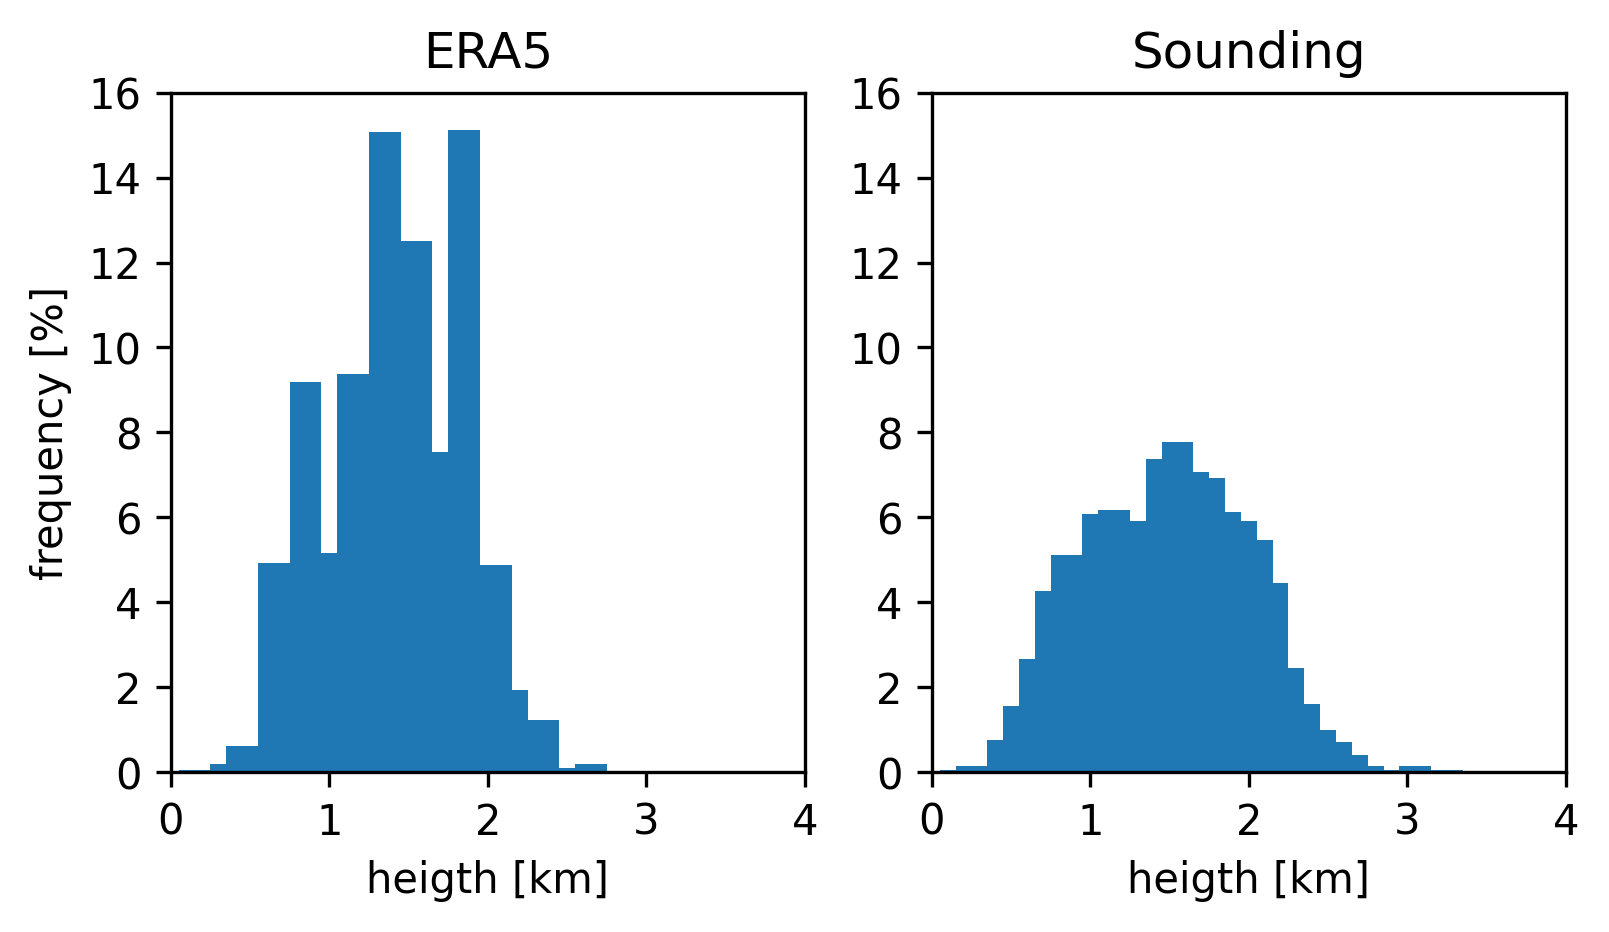

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path='Machine-Learning-in-Atmospheric-Thermodynamics/hw04-1'
filen=path+'/data/inver_data.dat'

nz=101
nvar=3
data=np.fromfile(filen,dtype=np.float32)
data=data.reshape(-1,2,nvar,nz)
ind=np.arange(data.shape[0])
np.random.shuffle(ind)
data=data[ind,:,:,:]

print(data.shape)
#print(data[1,1,1,1:40])
#print(data[1,1,2,1:40])
#print(data[1,1,0,1:40])

temp=np.zeros([data.shape[0],99])
inver_era=np.argmax(data[:,0,2,0:99],1)
indx=np.arange(temp.shape[0])
indy=inver_era
temp[indx,indy]=1
temp[:,0]=0
mask_era=np.copy(temp)

#print(np.sum(mask_era,0),np.sum(mask_era))
print(np.sum(mask_era))

temp=np.zeros([data.shape[0],99])
inver_snd=np.argmax(data[:,1,2,0:99],1)
indx=np.arange(temp.shape[0])
indy=inver_snd
temp[indx,indy]=1
temp[:,0]=0
mask_snd=np.copy(temp)

#print(np.sum(mask_snd,0),np.sum(mask_snd))
print(np.sum(mask_snd))

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(6,3),dpi=300)
ax=ax.flatten()

x=0.1*np.arange(temp.shape[1])[0:50]+0.05
y=np.sum(mask_era,0)[0:50]/np.sum(mask_era)*100.
ax[0].bar(x,y,width=0.2)
ax[0].set_ylim([0,16])
ax[0].set_xlim([0,4])
ax[0].set_xlabel('heigth [km]')
ax[0].set_ylabel('frequency [%]')
ax[0].set_title('ERA5')

y=np.sum(mask_snd,0)[0:50]/np.sum(mask_snd)*100.
ax[1].bar(x,y,width=0.2)
ax[1].set_ylim([0,16])
ax[1].set_xlim([0,4])
ax[1].set_xlabel('heigth [km]')
ax[1].set_title('Sounding')

print(inver_era[0:100])
print(inver_snd[0:100])

(3,) (9417, 2, 3, 101)
0 0
0 0
0 0


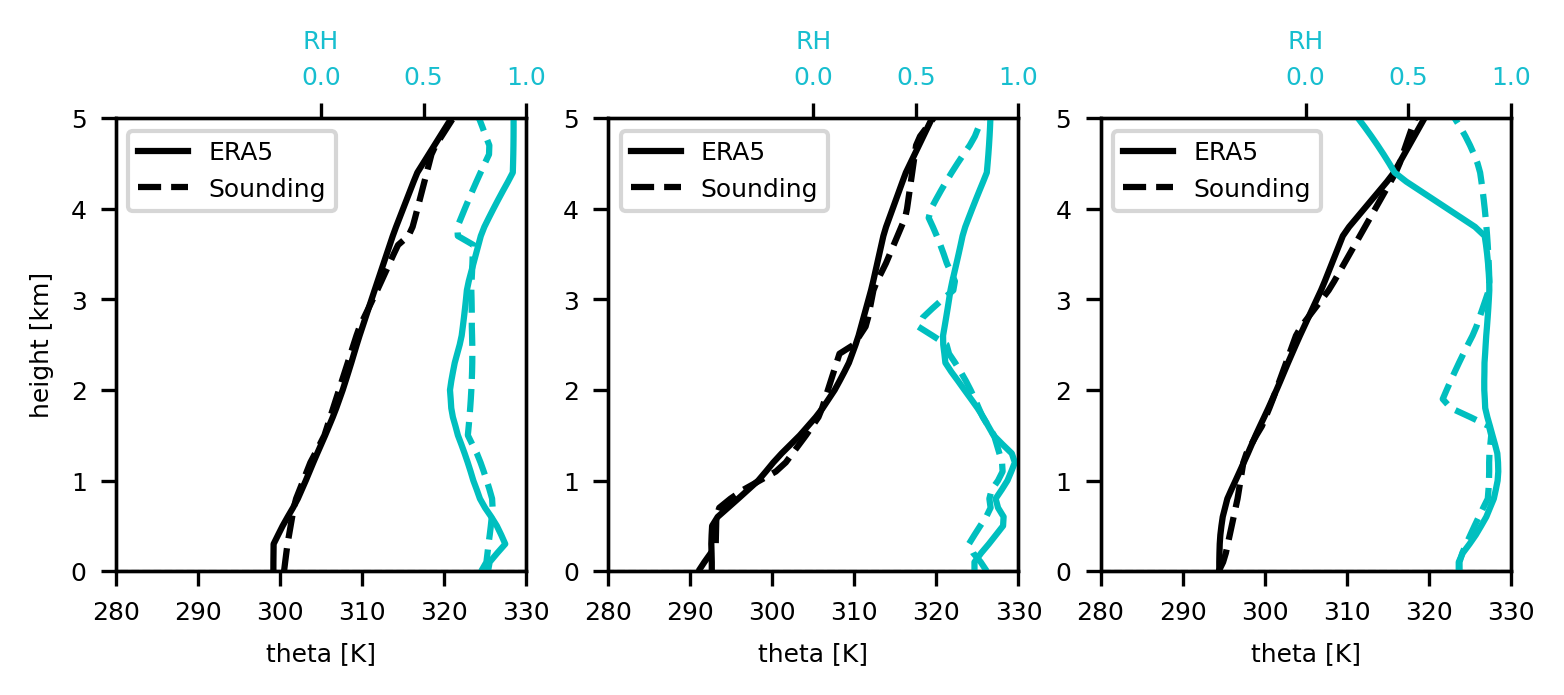

In [3]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]==0 and inver_snd[n]==0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:99],z,'c-',data[n,1,1,0:99],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break
     

(3,) (9417, 2, 3, 101)
8 8
6 9
6 7


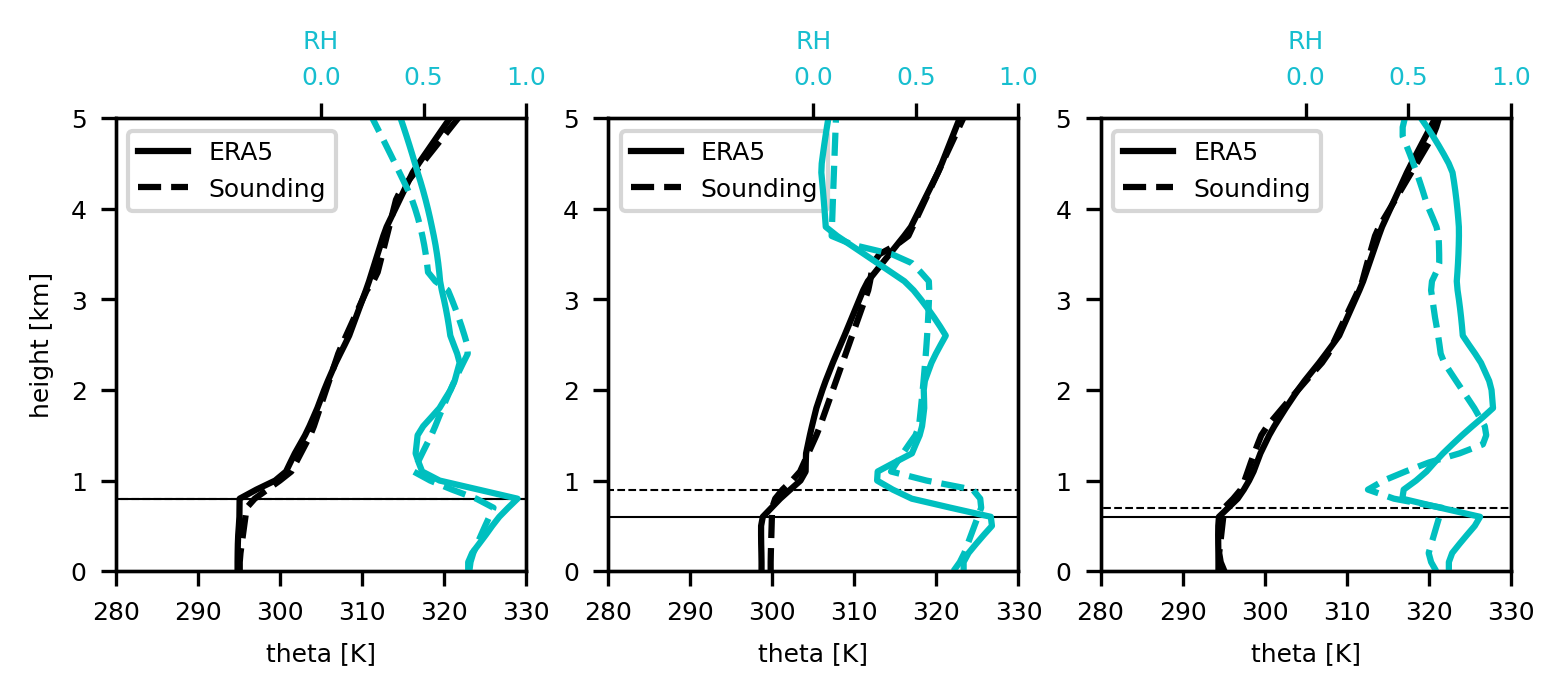

In [4]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(6,2),dpi=300)
ax=ax.flatten()

z=0.1*np.arange(temp.shape[1])
a=0
print(ax.shape,data.shape)
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    print(inver_era[n],inver_snd[n])
    ax[a].plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--')
    ax[a].plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
    ax[a].set_ylim([0,5])
    ax[a].set_xlim([280,330])
    ax[a].set_xticks(np.arange(280,331,10))
    ax[a].set_xlabel('theta [K]',fontsize=6)
    ax[a].tick_params(labelsize=6)
    color='tab:cyan'
    ax2=ax[a].twiny()  
    ax2.plot(data[n,0,1,0:99],z,'c-',data[n,1,1,0:99],z,'c--')
    ax2.set_xlim([-1,1])
    ax2.set_xticks(np.arange(0,1.1,0.5))
    ax2.tick_params(axis='x',labelcolor=color,labelsize=6)
    ax2.set_xlabel('RH',fontsize=6,color=color)
    ax[a].legend(['ERA5','Sounding'],loc=2,fontsize=6)
    if a==0:
      ax[a].set_ylabel('height [km]',fontsize=6)
    a=a+1
  if a==3:
    break

1359


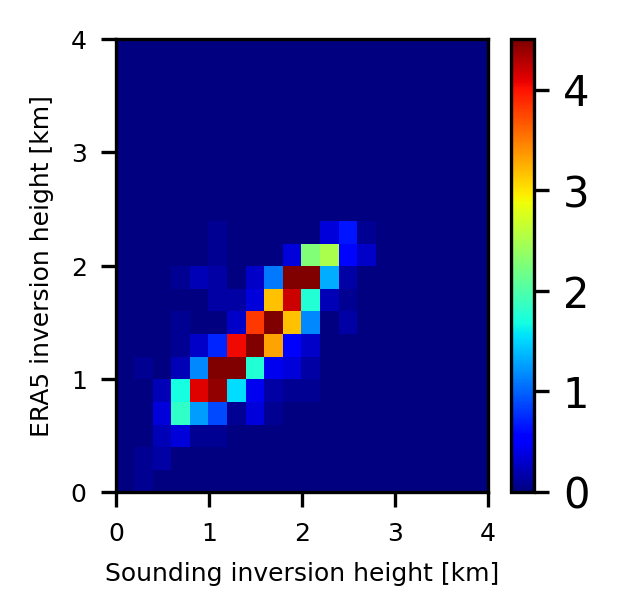

In [5]:
cm=np.zeros([21,21])
a=0
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    cm[int(inver_era[n]/2),int(inver_snd[n]/2)]+=1
    a+=1

print(a)
cm=cm/a*100

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)

cm=ax.pcolormesh(z[np.arange(0,42,2)],z[np.arange(0,42,2)],cm,cmap='jet',vmin=0,vmax=4.5)
ax.set_xticks(np.arange(0,4.1,1))
ax.set_yticks(np.arange(0,4.1,1))
ax.set_xlabel('Sounding inversion height [km]',fontsize=6)
ax.set_ylabel('ERA5 inversion height [km]',fontsize=6)
ax.tick_params(labelsize=6)
fig.colorbar(cm)

48.0 47.0
1359


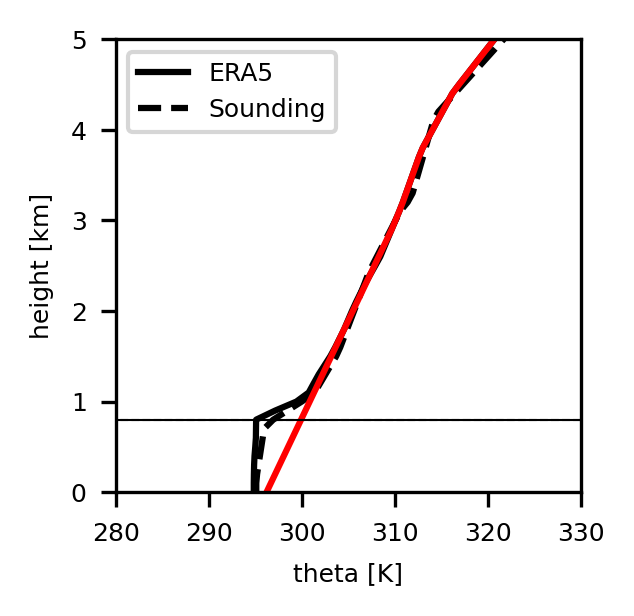

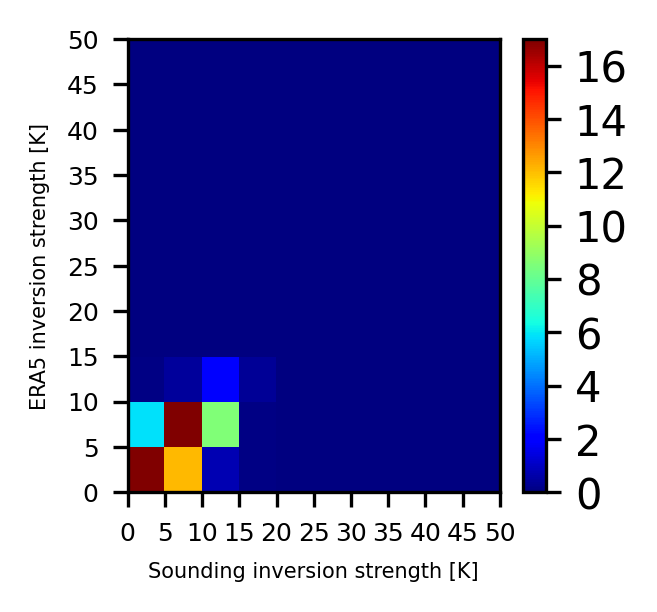

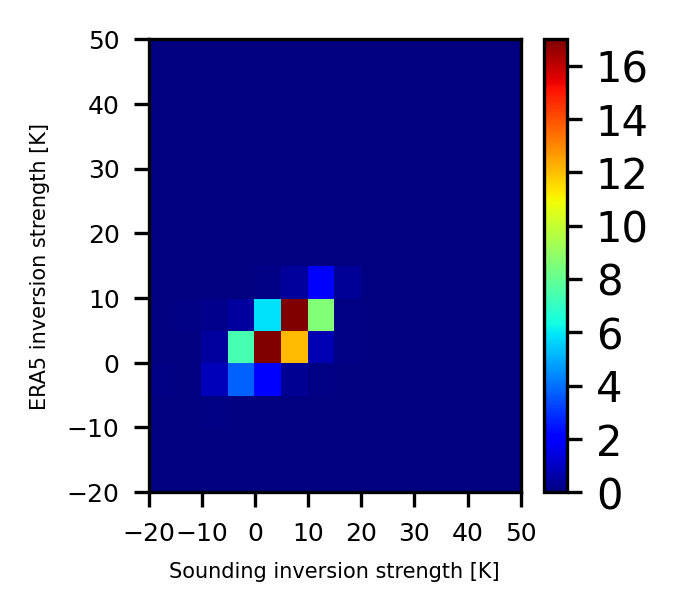

In [6]:
interp_era=np.copy(data[:,0,0,:])
rate_era=np.copy(data[:,0,2,100])
ind_era=np.copy(data[:,0,2,99])
interp_snd=np.copy(data[:,1,0,:])
rate_snd=np.copy(data[:,1,2,100])
ind_snd=np.copy(data[:,1,2,99])

#print(rate_era[0:40])
#print(ind_era[0:40])

print(np.max(ind_snd),np.max(ind_era))

for t in range(0,interp_era.shape[0]):
  nn=ind_era[t].astype(np.int64)
  for n in range(nn,0,-1):
    interp_era[t,n-1]=interp_era[t,n]-100.*rate_era[t]
  nn=ind_snd[t].astype(np.int64)
  for n in range(nn,0,-1):
    interp_snd[t,n-1]=interp_snd[t,n]-100.*rate_snd[t]

  #print(t)

#n=190
#print(ind_snd[n],ind_era[n],rate_snd[n],rate_era[n])
#print(interp_era[n,:],interp_snd[n,:])
#print(inver_era[n],inver_snd[n])

a=0
inv_era=[]
inv_snd=[]
invh_era=[]
invh_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    #print(a,n,inver_era[n],inver_snd[n])
    if a==0:
      fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
      ax.plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--',interp_era[n,0:99],z,'r-')
      ax.plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
      ax.set_ylim([0,5])
      ax.set_xlim([280,330])
      ax.set_xticks(np.arange(280,331,10))
      ax.set_xlabel('theta [K]',fontsize=6)
      ax.tick_params(labelsize=6)
      ax.legend(['ERA5','Sounding'],loc=2,fontsize=6)
      ax.set_ylabel('height [km]',fontsize=6)

    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    invh_era.append(inver_era[n])
    inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    inv_snd.append(inv)
    invh_snd.append(inver_snd[n])
  
    a=a+1


cm=np.zeros([15,15])
strength=np.arange(-20,55,5)
a=0
for n in range(0,len(inv_era)):
  xx=int((inv_era[n]+20)/5)
  yy=int((inv_snd[n]+20)/5)
  cm[xx,yy]+=1
  a+=1

print(a)
cm=cm/a*100


fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
#cm=plt.hist2d(inv_snd,inv_era,cmap='Blues',vmin=0,vmax=200,bins=np.arange(-50,51,5))
#plt.colorbar()
cb=ax.pcolormesh(strength,strength,cm,cmap='jet',vmin=0,vmax=17)
ax.set_ylim([0,50])
ax.set_xlim([0,50])
ax.set_xticks(np.arange(0,51,5))
ax.set_yticks(np.arange(0,51,5))
ax.set_xlabel('Sounding inversion strength [K]',fontsize=5)
ax.set_ylabel('ERA5 inversion strength [K]',fontsize=5)
ax.tick_params(labelsize=6)
fig.colorbar(cb,ticks=np.arange(0,18,2))

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
#cm=plt.hist2d(inv_snd,inv_era,cmap='Blues',vmin=0,vmax=200,bins=np.arange(-50,51,5))
#plt.colorbar()
cb=ax.pcolormesh(strength,strength,cm,cmap='jet',vmin=0,vmax=17)
ax.set_ylim([-20,50])
ax.set_xlim([-20,50])
ax.set_xticks(np.arange(-20,51,10))
ax.set_yticks(np.arange(-20,51,10))
ax.set_xlabel('Sounding inversion strength [K]',fontsize=5)
ax.set_ylabel('ERA5 inversion strength [K]',fontsize=5)
ax.tick_params(labelsize=6)
fig.colorbar(cb,ticks=np.arange(0,18,2))


-0.8768616
-3.190033
-3.5283508
-0.17599487


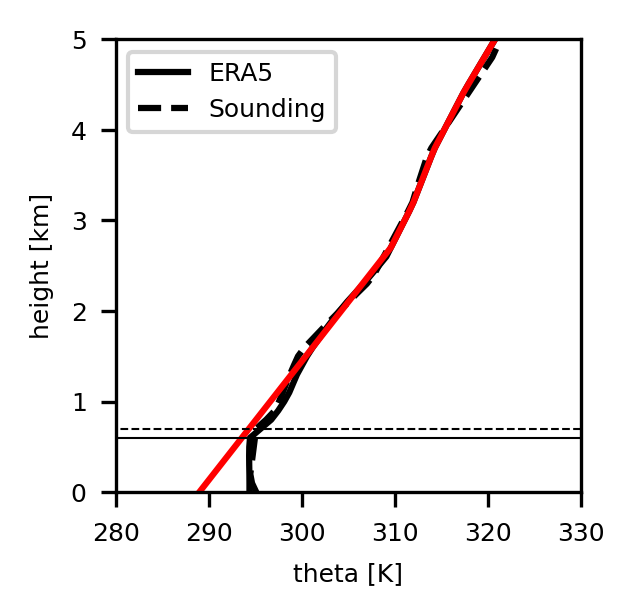

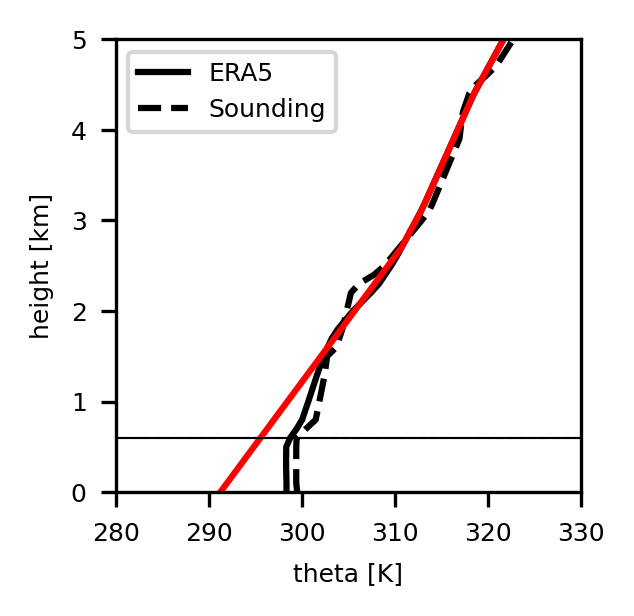

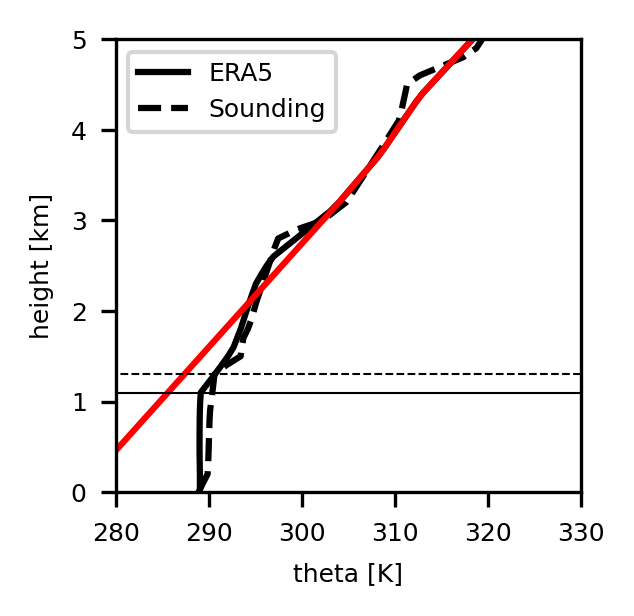

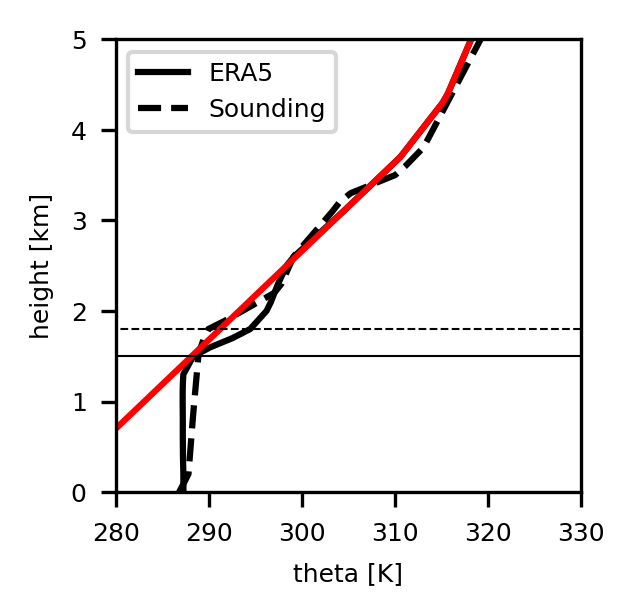

In [7]:
a=0
inv_era=[]
inv_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0 and inver_snd[n]>0:
    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    #inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    #inv_snd.append(inv)

    if a<=3 and inv<=0:
      print(inv)
      fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=300)
      ax.plot(data[n,0,0,0:99],z,'k-',data[n,1,0,0:99],z,'k--',interp_era[n,0:99],z,'r-')
      ax.plot([0.,600.],[0.1*inver_era[n],0.1*inver_era[n]],'k-',[0.,600.],[0.1*inver_snd[n],0.1*inver_snd[n]],'k--',lw=0.5)
      ax.set_ylim([0,5])
      ax.set_xlim([280,330])
      ax.set_xticks(np.arange(280,331,10))
      ax.set_xlabel('theta [K]',fontsize=6)
      ax.tick_params(labelsize=6)
      ax.legend(['ERA5','Sounding'],loc=2,fontsize=6)
      ax.set_ylabel('height [km]',fontsize=6)
      a=a+1


2111
1993


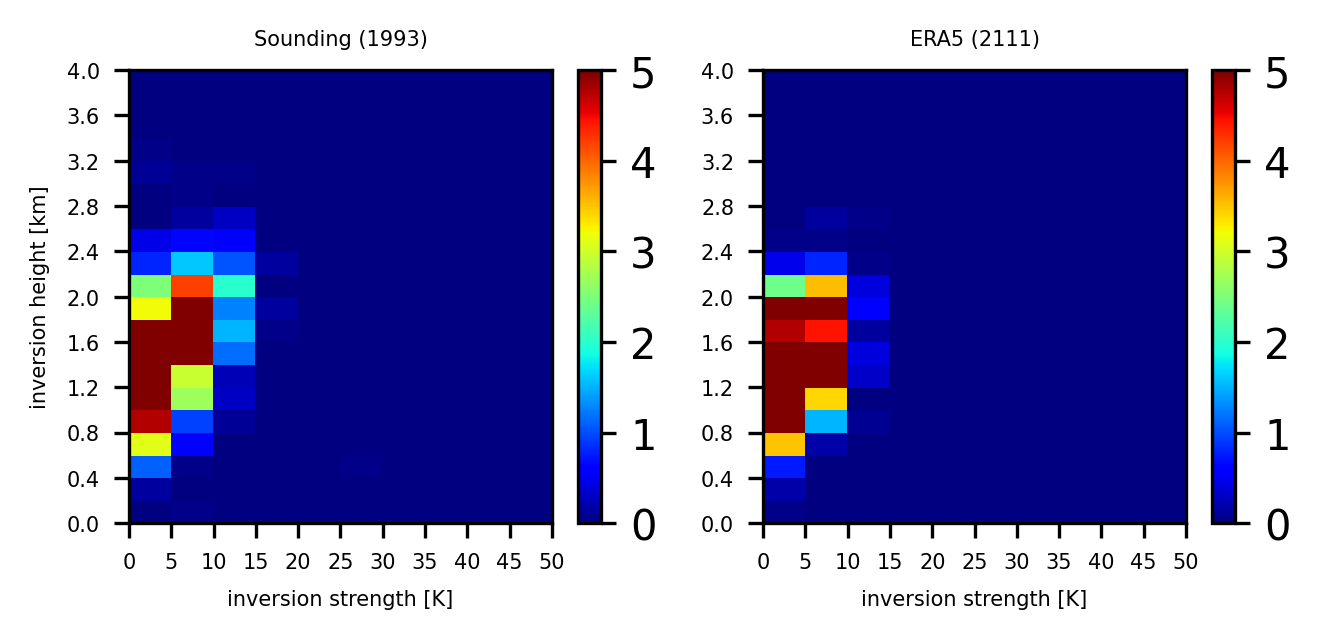

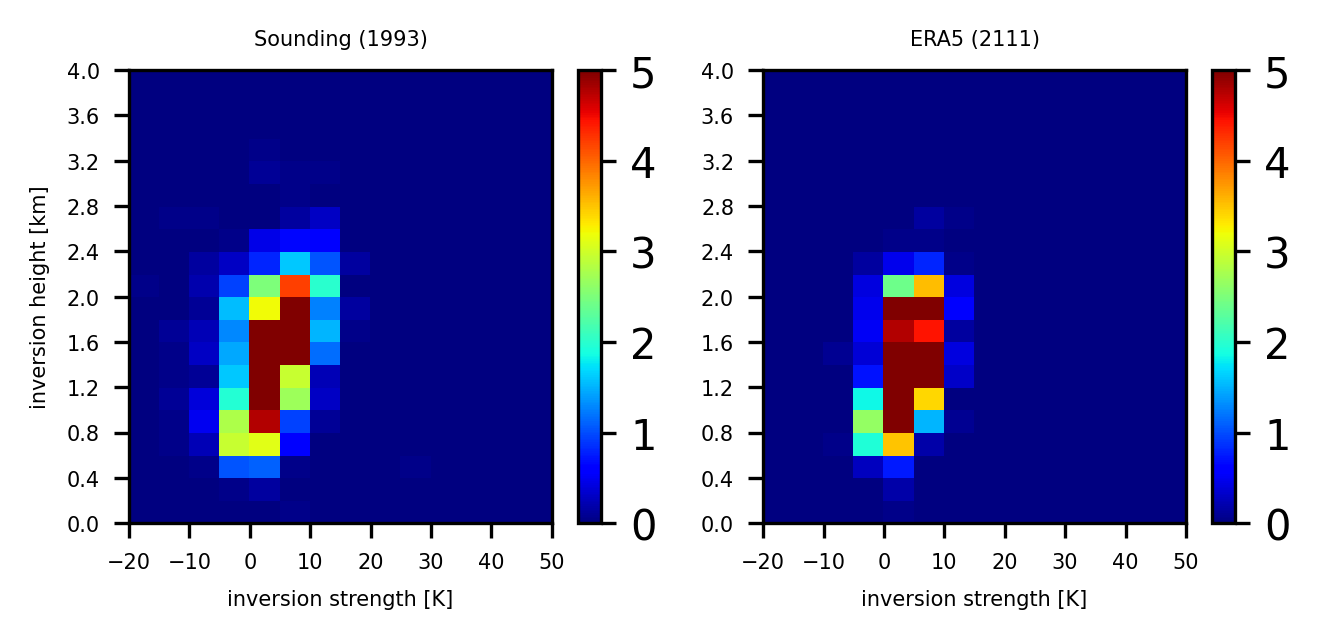

In [8]:
a1=0
a2=0
inv_era=[]
inv_snd=[]
invh_era=[]
invh_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0:
    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    invh_era.append(inver_era[n])
    a1=a1+1

  if inver_snd[n]>0:
    inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    inv_snd.append(inv)
    invh_snd.append(inver_snd[n])
    a2=a2+1


cm1=np.zeros([21,15])
strength=np.arange(-20,55,5)
a=0
for n in range(0,len(inv_era)):
  yy=int((inv_era[n]+20)/5)
  xx=int((invh_era[n])/2)
  cm1[xx,yy]+=1
  a+=1

print(a)
cm1=cm1/a*100

cm2=np.zeros([21,15])
a=0
for n in range(0,len(inv_snd)):
  yy=int((inv_snd[n]+20)/5)
  xx=int((invh_snd[n])/2)
  cm2[xx,yy]+=1
  a+=1

print(a)
cm2=cm2/a*100

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,2),dpi=300)
cb=ax[0].pcolormesh(strength,z[np.arange(0,42,2)],cm2,cmap='jet',vmin=0,vmax=5)
ax[0].set_ylim([0,4])
ax[0].set_xlim([0,50])
ax[0].set_xticks(np.arange(0,51,5))
ax[0].set_yticks(np.arange(0,4.1,0.4))
ax[0].set_xlabel('inversion strength [K]',fontsize=5)
ax[0].set_ylabel('inversion height [km]',fontsize=5)
ax[0].set_title('Sounding (1993)',fontsize=5)
ax[0].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,5.1,1),ax=ax[1])
cb=ax[1].pcolormesh(strength,z[np.arange(0,42,2)],cm1,cmap='jet',vmin=0,vmax=5)
ax[1].set_ylim([0,4])
ax[1].set_xlim([0,50])
ax[1].set_xticks(np.arange(0,51,5))
ax[1].set_yticks(np.arange(0,4.1,0.4))
ax[1].set_xlabel('inversion strength [K]',fontsize=5)
ax[1].set_title('ERA5 (2111)',fontsize=5)
ax[1].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,5.1,1),ax=ax[0])

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,2),dpi=300)
cb=ax[0].pcolormesh(strength,z[np.arange(0,42,2)],cm2,cmap='jet',vmin=0,vmax=5)
ax[0].set_ylim([0,4])
ax[0].set_xlim([-20,50])
ax[0].set_xticks(np.arange(-20,51,10))
ax[0].set_yticks(np.arange(0,4.1,0.4))
ax[0].set_xlabel('inversion strength [K]',fontsize=5)
ax[0].set_ylabel('inversion height [km]',fontsize=5)
ax[0].set_title('Sounding (1993)',fontsize=5)
ax[0].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,5.1,1),ax=ax[0])
cb=ax[1].pcolormesh(strength,z[np.arange(0,42,2)],cm1,cmap='jet',vmin=0,vmax=5)
ax[1].set_ylim([0,4])
ax[1].set_xlim([-20,50])
ax[1].set_xticks(np.arange(-20,51,10))
ax[1].set_yticks(np.arange(0,4.1,0.4))
ax[1].set_xlabel('inversion strength [K]',fontsize=5)
ax[1].set_title('ERA5 (2111)',fontsize=5)
ax[1].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,5.1,1),ax=ax[1])

2111
1993


<ipython-input-9-86ffe01d3da2>:31: RuntimeWarning: invalid value encountered in true_divide
  cm1=cm1/np.sum(cm1,0)*100.
<ipython-input-9-86ffe01d3da2>:42: RuntimeWarning: invalid value encountered in true_divide
  cm2=cm2/np.sum(cm2,0)*100.


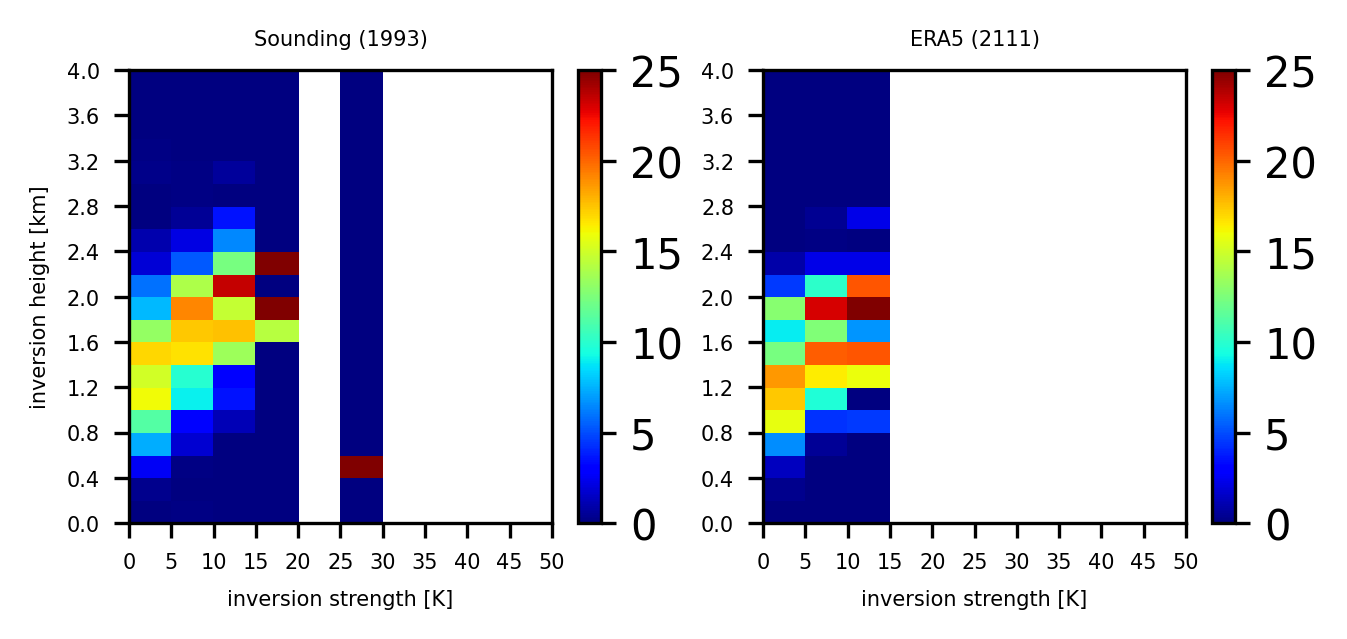

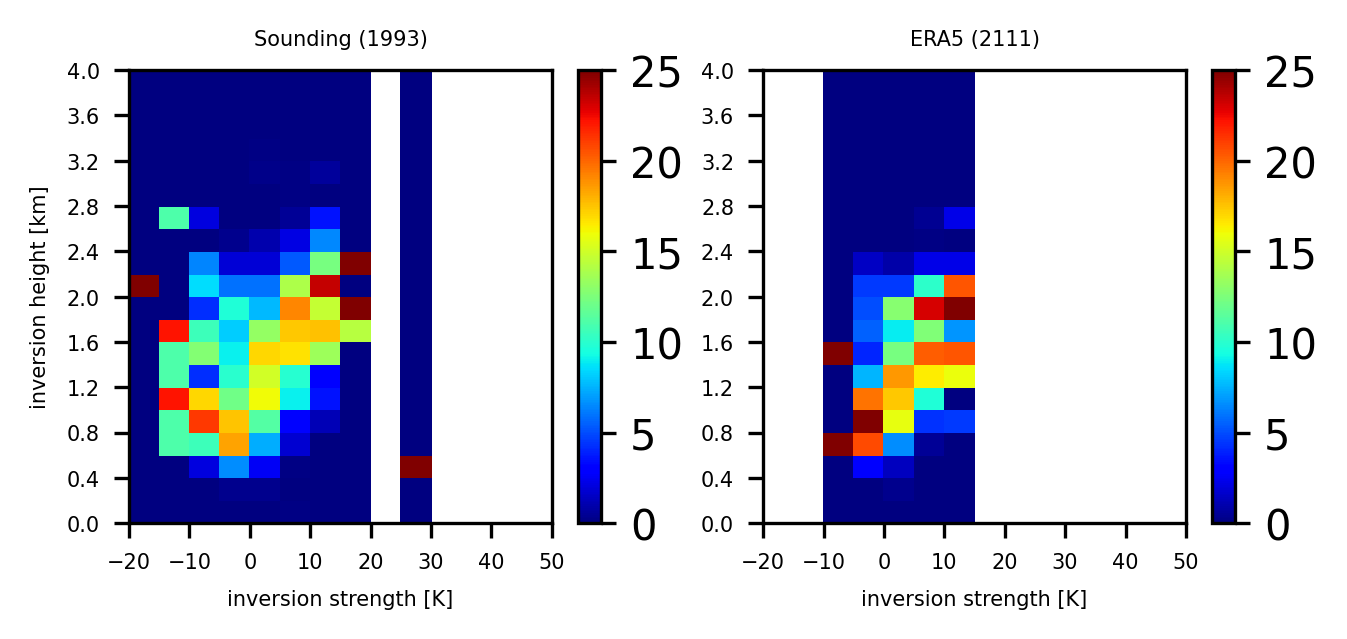

In [9]:
a1=0
a2=0
inv_era=[]
inv_snd=[]
invh_era=[]
invh_snd=[]
for n in range(0,inver_era.shape[0]):
  if inver_era[n]>0:
    inv=interp_era[n,inver_era[n]]-data[n,0,0,inver_era[n]]
    inv_era.append(inv)
    invh_era.append(inver_era[n])
    a1=a1+1

  if inver_snd[n]>0:
    inv=interp_snd[n,inver_snd[n]]-data[n,1,0,inver_snd[n]]
    inv_snd.append(inv)
    invh_snd.append(inver_snd[n])
    a2=a2+1


cm1=np.zeros([21,15])
strength=np.arange(-20,55,5)
a=0
for n in range(0,len(inv_era)):
  yy=int((inv_era[n]+20)/5)
  xx=int((invh_era[n])/2)
  cm1[xx,yy]+=1
  a+=1

print(a)
cm1=cm1/np.sum(cm1,0)*100.

cm2=np.zeros([21,15])
a=0
for n in range(0,len(inv_snd)):
  yy=int((inv_snd[n]+20)/5)
  xx=int((invh_snd[n])/2)
  cm2[xx,yy]+=1
  a+=1

print(a)
cm2=cm2/np.sum(cm2,0)*100.


fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,2),dpi=300)
cb=ax[0].pcolormesh(strength,z[np.arange(0,42,2)],cm2,cmap='jet',vmin=0,vmax=25)
ax[0].set_ylim([0,4])
ax[0].set_xlim([0,50])
ax[0].set_xticks(np.arange(0,51,5))
ax[0].set_yticks(np.arange(0,4.1,0.4))
ax[0].set_xlabel('inversion strength [K]',fontsize=5)
ax[0].set_ylabel('inversion height [km]',fontsize=5)
ax[0].set_title('Sounding (1993)',fontsize=5)
ax[0].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,25.1,5),ax=ax[1])
cb=ax[1].pcolormesh(strength,z[np.arange(0,42,2)],cm1,cmap='jet',vmin=0,vmax=25)
ax[1].set_ylim([0,4])
ax[1].set_xlim([0,50])
ax[1].set_xticks(np.arange(0,51,5))
ax[1].set_yticks(np.arange(0,4.1,0.4))
ax[1].set_xlabel('inversion strength [K]',fontsize=5)
ax[1].set_title('ERA5 (2111)',fontsize=5)
ax[1].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,25.1,5),ax=ax[0])

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(5,2),dpi=300)
cb=ax[0].pcolormesh(strength,z[np.arange(0,42,2)],cm2,cmap='jet',vmin=0,vmax=25)
ax[0].set_ylim([0,4])
ax[0].set_xlim([-20,50])
ax[0].set_xticks(np.arange(-20,51,10))
ax[0].set_yticks(np.arange(0,4.1,0.4))
ax[0].set_xlabel('inversion strength [K]',fontsize=5)
ax[0].set_ylabel('inversion height [km]',fontsize=5)
ax[0].set_title('Sounding (1993)',fontsize=5)
ax[0].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,25.1,5),ax=ax[0])
cb=ax[1].pcolormesh(strength,z[np.arange(0,42,2)],cm1,cmap='jet',vmin=0,vmax=25)
ax[1].set_ylim([0,4])
ax[1].set_xlim([-20,50])
ax[1].set_xticks(np.arange(-20,51,10))
ax[1].set_yticks(np.arange(0,4.1,0.4))
ax[1].set_xlabel('inversion strength [K]',fontsize=5)
ax[1].set_title('ERA5 (2111)',fontsize=5)
ax[1].tick_params(labelsize=5)
fig.colorbar(cb,ticks=np.arange(0,25.1,5),ax=ax[1])